## importing torch

In [50]:
import torch
torch.__version__

'1.12.0'

In [51]:
 torch.cuda.is_available()

False

## example

In [12]:
dd=[[1,2,3],[4,5,6],[7,8,9]]
t=torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [5]:
t.shape

torch.Size([3, 3])

In [8]:
t=t.reshape(1,9)

In [13]:
len(t.shape)

2

In [14]:
dd[1]

[4, 5, 6]

In [17]:
t=torch.Tensor()
print(t.dtype)
print(t.device)
print(t.layout)

torch.float32
cpu
torch.strided


In [20]:
device=torch.device('cuda:0')
device

device(type='cuda', index=0)

## constructor & factory function

In [23]:
import numpy as np
data=np.array([1,2,3])
o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)
print(o1,o2,o3,o4)

tensor([1., 2., 3.]) tensor([1, 2, 3], dtype=torch.int32) tensor([1, 2, 3], dtype=torch.int32) tensor([1, 2, 3], dtype=torch.int32)


## reshapping

In [47]:
t=torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)
# number of elements
print(torch.tensor(t.shape).prod())
print(torch.numel(t))

tensor(12)
12


In [49]:
t=t.reshape(1,-1)
print(t)
print(t.shape)
t=t.squeeze()
print(t)
print(t.shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


## flatten

In [52]:
def flatten(t):
    t=t.reshape(1,-1)
    t=t.squeeze()
    return t

In [41]:
f=torch.tensor([[1,1,1],[2,3,4],[7,8,5]])
t=f.reshape(1,-1)
t1=t.squeeze()
t2=t1.unsqueeze(dim=0)
print(f)
print(t)
print(t1)
print(t2)
print(t.shape)
print(t1.shape)
print(t2.shape)
f=flatten(f)
print(f)
print(f.shape)

tensor([[1, 1, 1],
        [2, 3, 4],
        [7, 8, 5]])
tensor([[1, 1, 1, 2, 3, 4, 7, 8, 5]])
tensor([1, 1, 1, 2, 3, 4, 7, 8, 5])
tensor([[1, 1, 1, 2, 3, 4, 7, 8, 5]])
torch.Size([1, 9])
torch.Size([9])
torch.Size([1, 9])
tensor([1, 1, 1, 2, 3, 4, 7, 8, 5])
torch.Size([9])


## cancatenate

In [44]:
t1=torch.tensor([[1,2,3],[5,6,7]])
t2=torch.tensor([[1,6,2],[6,6,9]])
t3=torch.cat((t1,t1), dim=0) # row wise
t4=torch.cat((t1,t1), dim=1) # column wise
print(t3)
print(t3.shape)
print(t4)
print(t4.shape)

tensor([[1, 2, 3],
        [5, 6, 7],
        [1, 2, 3],
        [5, 6, 7]])
torch.Size([4, 3])
tensor([[1, 2, 3, 1, 2, 3],
        [5, 6, 7, 5, 6, 7]])
torch.Size([2, 6])


## combining gray scale images

In [75]:
#three images

t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,5,3]
])

t=torch.stack((t1,t2,t3))
print(t.shape)
# 3----batch size,1--------channal, 

t=t.reshape(3,1,4,4)
print(t.shape)
print(t)

torch.Size([3, 4, 4])
torch.Size([3, 1, 4, 4])
tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 5, 3]]]])


In [76]:
print(t[0])

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])


In [77]:
print(t[1])

tensor([[[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]]])


In [78]:
print(t.shape)

torch.Size([3, 1, 4, 4])


In [60]:
print(t[0][0][0][0])

tensor(1)


In [63]:
# acces 5
print(t[2][0][3][2])

tensor(5)


In [65]:
t=t.reshape(1,-1).squeeze()
t

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3])

In [82]:
t=t.reshape(t.shape[0],(torch.numel(t)//t.shape[0])).squeeze()
t.shape

torch.Size([3, 16])

In [83]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

## Element-Wise Tensor Operations For Deep Learning

In [3]:
import torch
t1=torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32)
t2=torch.tensor([[1,2,3],[4,7,6]] ,dtype=torch.float32)
t=t1+t2
print(t)

tensor([[ 2.,  4.,  6.],
        [ 8., 12., 12.]])


In [4]:
t=t1-t2
print(t)
t=t1*t2
print(t)
t=t1/t2
print(t)

tensor([[ 0.,  0.,  0.],
        [ 0., -2.,  0.]])
tensor([[ 1.,  4.,  9.],
        [16., 35., 36.]])
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 0.7143, 1.0000]])


### broadcasting

In [7]:
t=t1-2
print(t)
t=t1*2
print(t)
t=t1/2
print(t)
print(t1.add(2))
print(t1.sub(2))
print(t1.mul(2))
print(t1.div(2))

tensor([[-1.,  0.,  1.],
        [ 2.,  3.,  4.]])
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[3., 4., 5.],
        [6., 7., 8.]])
tensor([[-1.,  0.,  1.],
        [ 2.,  3.,  4.]])
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])


In [10]:
import numpy as np
t3=torch.tensor(np.broadcast_to(2, t1.shape),dtype=torch.float32)
print(t3)

tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [11]:
t=t1+t3
print(t)

tensor([[3., 4., 5.],
        [6., 7., 8.]])


In [13]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)
t5=torch.tensor(np.broadcast_to(t2, t1.shape),dtype=torch.float32)
print(t5)

tensor([[2., 4.],
        [2., 4.]])


### comparison

In [18]:
print(t1>t2)
print(t1.eq(0))
print(t1<t2)
print(t1.ge(1))


tensor([[False, False],
        [False, False]])
tensor([[False, False],
        [False, False]])
tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


In [19]:
t.abs() 

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [20]:
t.sqrt()

tensor([[1.7321, 2.0000, 2.2361],
        [2.4495, 2.6458, 2.8284]])

## Tensor Reduction Ops For Deep Learning

In [8]:
import torch
t=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
print(t.sum())
print(t.sum().numel()<t.numel())
t.prod()
t.std()

tensor(21.)
True


tensor(1.8708)

In [9]:
t.sum(dim=0)

tensor([5., 7., 9.])

In [10]:
t.sum(dim=1)

tensor([ 6., 15.])

In [11]:
print(t[0])
print(t[1])

tensor([1., 2., 3.])
tensor([4., 5., 6.])


In [12]:
t[0].sum()

tensor(6.)

In [14]:
t.max()
print(t.max())
print(t.argmax())

tensor(6.)
tensor(5)


In [15]:
t.argmax(dim=0)

tensor([1, 1, 1])

In [16]:
t.max(dim=0)

torch.return_types.max(
values=tensor([4., 5., 6.]),
indices=tensor([1, 1, 1]))

In [18]:
print(t.mean())
t.mean().item()

tensor(3.5000)


3.5

In [20]:
print(t.mean(dim=0).tolist())
t.mean(dim=0).numpy()


[2.5, 3.5, 4.5]


array([2.5, 3.5, 4.5], dtype=float32)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [4]:

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
train_loader=torch.utils.data.DataLoader(train_set,batch_size=1000,shuffle=True)


## data visulaizing

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


train_set=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

loader=torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)


In [7]:
sample=next(iter(train_set))
print(type(sample))
print(sample)


<class 'tuple'>
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039

Text(0.5, 0, '9')

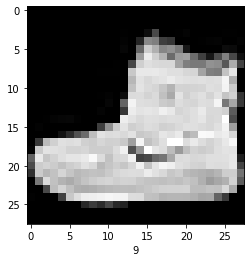

In [12]:
import matplotlib.pyplot as plt
image,label=sample
plt.imshow(image.squeeze(),cmap='gray')
plt.xlabel(label)

In [14]:
# disply a batch
laoder= torch.utils.data.DataLoader(train_set, batch_size=10)

In [15]:
batch=next(iter(laoder))

In [18]:
print(len(batch))

2


Text(0.5, 0, 'tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])')

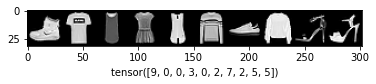

In [24]:
import numpy as np
images,labels=batch
images[0].shape 
grid=torchvision.utils.make_grid(images, nrow=10)
plt.imshow(np.transpose(grid, (1,2,0)))
plt.xlabel(labels)

In [ ]:
class Network(nn.Module): # line 1
    def __init__(self):
        super(Network,self).__init__() # line 3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = self.layer(t)
        return t